In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [97]:
df = pd.read_csv(r'/content/kidney.csv', sep = ',')

In [98]:
df.shape

(400, 26)

In [99]:
df.drop('id', axis = 1, inplace = True)

In [100]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [101]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [103]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [105]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [106]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [107]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [108]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [109]:
df.isna().sum().sort_values(ascending = False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [110]:
df[num_cols].isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
sodium,87
potassium,88


In [111]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1
aanemia,1


In [112]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [113]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [114]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


In [115]:
# Encoding
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [116]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,147.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,101.0,18.0,0.8,145.0,4.0,11.3,38.0,6000.0,5.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,136.0,5.0,9.6,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,142.0,4.0,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [117]:
for i in df.columns:
    print(df[i].head(1))
    print(df[i].min())
    print(df[i].max())
    print(df[i].mean())
    print("###################")

0    48.0
Name: age, dtype: float64
2.0
90.0
51.3825
###################
0    80.0
Name: blood_pressure, dtype: float64
50.0
180.0
76.35
###################
0    1.02
Name: specific_gravity, dtype: float64
1.005
1.025
1.01725
###################
0    1.0
Name: albumin, dtype: float64
0.0
5.0
1.0325
###################
0    0.0
Name: sugar, dtype: float64
0.0
5.0
0.4475
###################
0    0
Name: red_blood_cells, dtype: int64
0
1
0.8125
###################
0    1
Name: pus_cell, dtype: int64
0
1
0.77
###################
0    0
Name: pus_cell_clumps, dtype: int64
0
1
0.105
###################
0    0
Name: bacteria, dtype: int64
0
1
0.055
###################
0    121.0
Name: blood_glucose_random, dtype: float64
22.0
490.0
148.305
###################
0    36.0
Name: blood_urea, dtype: float64
1.5
391.0
58.240500000000004
###################
0    1.2
Name: serum_creatinine, dtype: float64
0.4
76.0
3.078875
###################
0    147.0
Name: sodium, dtype: float64
4.5
163.0
137.62375

In [118]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from scipy.stats import expon, uniform

In [120]:
#logistic
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(X_train, y_train)

y_pred_LR = LRclassifier.predict(X_test)
LRAcc = accuracy_score(y_pred_LR, y_test)
print(LRAcc)

0.9583333333333334


In [121]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7928571428571428
Test Accuracy of KNN is 0.6833333333333333 

Confusion Matrix :- 
[[54 18]
 [20 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        72
           1       0.61      0.58      0.60        48

    accuracy                           0.68       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.68      0.68      0.68       120



In [122]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[69  3]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.94      0.96      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [123]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [124]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.9928571428571429


In [125]:
# best estimator
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9857142857142858
Test Accuracy of Decision Tree Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [126]:
rd_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=11,
    max_features='sqrt',  # or 'log2' or None
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130
)
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [127]:
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(X_train, y_train)

y_pred_SVM = SVMclassifier.predict(X_test)
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print(SVMAcc)

0.425


In [128]:
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, y_train)

y_pred_GNB = GNBclassifier.predict(X_test)
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print(GNBAcc)

0.6


In [129]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[71  1]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [130]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9666666666666667 

Confusion Matrix :- 
[[70  2]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.96      0.96      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [131]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree', 'Random Forest',
             'Gradient Boosting', 'XgBoost', 'Logistic Regression', 'Naive Bayes', 'SVM'],
    'Accuracy' : [knn_acc, dtc_acc, rd_clf_acc, gb_acc, xgb_acc,LRAcc, GNBAcc, SVMAcc]
})


df1 = models.sort_values(by = 'Accuracy', ascending = False)

In [132]:
df1

,Model,Accuracy
2,Random Forest,0.983333
3,Gradient Boosting,0.975000
1,Decision Tree,0.966667
4,XgBoost,0.966667
5,Logistic Regression,0.958333
0,KNN,0.683333
6,Naive Bayes,0.600000
7,SVM,0.425000


Text(0.5, 1.0, 'Model Vs Accuracy for Kidney')

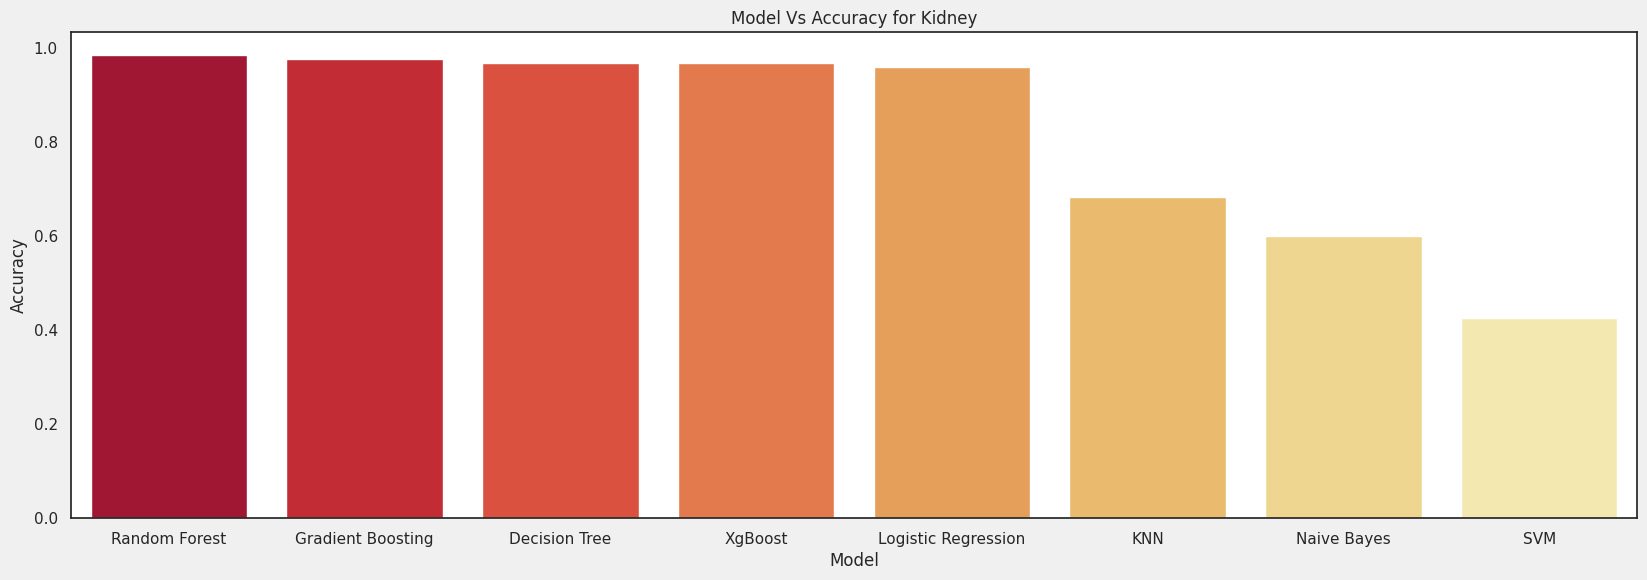

In [133]:
plt.figure(figsize=(18,6))
sns.set_theme(style='white')
sns.barplot(df1, x = 'Model', y = 'Accuracy', palette = 'YlOrRd_r')
plt.title("Model Vs Accuracy for Kidney")

In [134]:
# Assuming that the models and their accuracy variables are already defined from previous calculations
model_accuracies = {
    'KNN': (knn, knn_acc),
    'Decision Tree': (dtc, dtc_acc),
    'Random Forest': (rd_clf, rd_clf_acc),
    'Gradient Boosting': (gb, gb_acc),
    'XGBoost': (xgb, xgb_acc),
    'Logistic Regression': (LRclassifier, LRAcc),
    'Naive Bayes': (GNBclassifier, GNBAcc),
    'SVM': (SVMclassifier, SVMAcc)
}

# Find the best model based on accuracy
best_model_name, (best_model, best_accuracy) = max(model_accuracies.items(), key=lambda item: item[1][1])

# Save the best model
with open(f"kidney_model", "wb") as file:
    joblib.dump(best_model, file)

print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.8f}")


The best model is Random Forest with an accuracy of 0.98333333
